In [2]:
import torchvision
from PIL import Image
import requests
import io
import matplotlib.pyplot as plt
from io import BytesIO
import numpy as np
from torchvision import transforms
import torch

In [2]:
def load(url):
    """
    Given an url of an image, downloads the image and
    returns a PIL image
    """
    response = requests.get(url)
    pil_image = Image.open(BytesIO(response.content)).convert("RGB")
    # convert to BGR format
    image = np.array(pil_image)[:, :, [2, 1, 0]]
    return image

In [3]:
def imshow(img):
    plt.imshow(img[:, :, [2, 1, 0]])
    plt.axis("off")

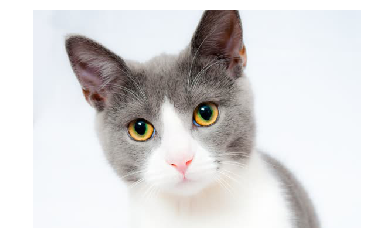

In [4]:
image = load("https://s3.amazonaws.com/mlpipes/pytorch-quick-start/cat.jpg")
imshow(image)

In [5]:
image_tensor = torchvision.transforms.functional.to_tensor(image)

In [6]:
image_tensor

tensor([[[0.9569, 0.9569, 0.9569,  ..., 0.9686, 0.9686, 0.9686],
         [0.9569, 0.9569, 0.9569,  ..., 0.9686, 0.9686, 0.9686],
         [0.9569, 0.9569, 0.9569,  ..., 0.9686, 0.9686, 0.9686],
         ...,
         [0.9882, 0.9882, 0.9882,  ..., 0.9922, 0.9922, 0.9922],
         [0.9882, 0.9882, 0.9882,  ..., 0.9922, 0.9922, 0.9922],
         [0.9882, 0.9882, 0.9882,  ..., 0.9922, 0.9922, 0.9922]],

        [[0.9333, 0.9333, 0.9333,  ..., 0.9373, 0.9373, 0.9373],
         [0.9333, 0.9333, 0.9333,  ..., 0.9373, 0.9373, 0.9373],
         [0.9333, 0.9333, 0.9333,  ..., 0.9373, 0.9373, 0.9373],
         ...,
         [0.9725, 0.9725, 0.9725,  ..., 0.9765, 0.9765, 0.9765],
         [0.9725, 0.9725, 0.9725,  ..., 0.9765, 0.9765, 0.9765],
         [0.9725, 0.9725, 0.9725,  ..., 0.9765, 0.9765, 0.9765]],

        [[0.9137, 0.9137, 0.9137,  ..., 0.9098, 0.9098, 0.9098],
         [0.9137, 0.9137, 0.9137,  ..., 0.9098, 0.9098, 0.9098],
         [0.9137, 0.9137, 0.9137,  ..., 0.9098, 0.9098, 0.

In [3]:
model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)
model.eval()

MaskRCNN(
  (transform): GeneralizedRCNNTransform()
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(original_name=FrozenBatchNorm2d)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(original_name=FrozenBatchNorm2d)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(original_name=FrozenBatchNorm2d)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(original_name=FrozenBatchNorm2d)
          (relu): ReLU(inplace=True)
          (downsample): Sequential(
         

In [8]:
with torch.no_grad():
    prediction = model([image_tensor])

In [9]:
prediction

[{'boxes': tensor([[ 50.1256,   4.9576, 460.1186, 361.7522],
          [ 35.2230,   2.3898, 385.5151, 224.7430]]),
  'labels': tensor([17, 17]),
  'masks': tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            ...,
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.]]],
  
  
          [[[0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            ...,
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.]]]]),
  'scores': tensor([0.9922, 0.0552])}]

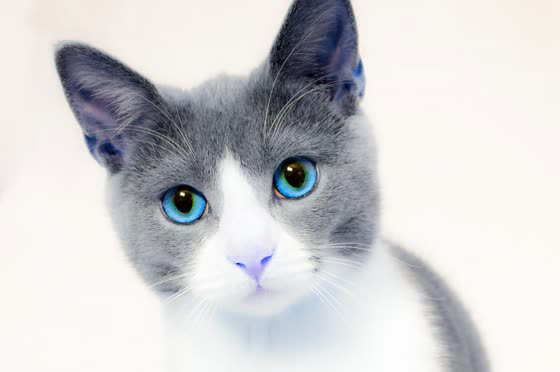

In [10]:
Image.fromarray(image_tensor.mul(255).permute(1, 2, 0).byte().numpy())

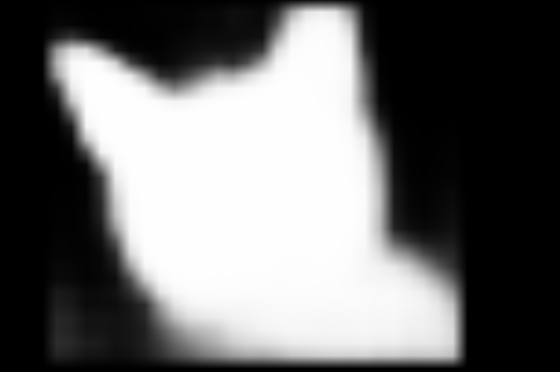

In [11]:
Image.fromarray(prediction[0]['masks'][0, 0].mul(255).byte().cpu().numpy())

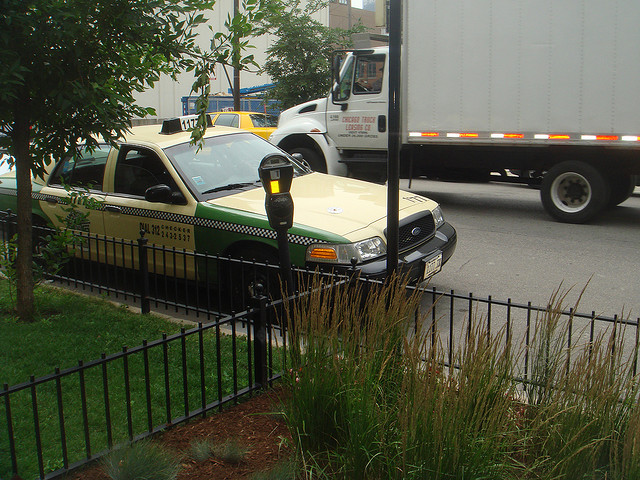

In [4]:
image = Image.open("./images/000000000001.jpg")
image

In [5]:
image_tensor = torchvision.transforms.functional.to_tensor(image)

In [6]:
with torch.no_grad():
    prediction = model([image_tensor])

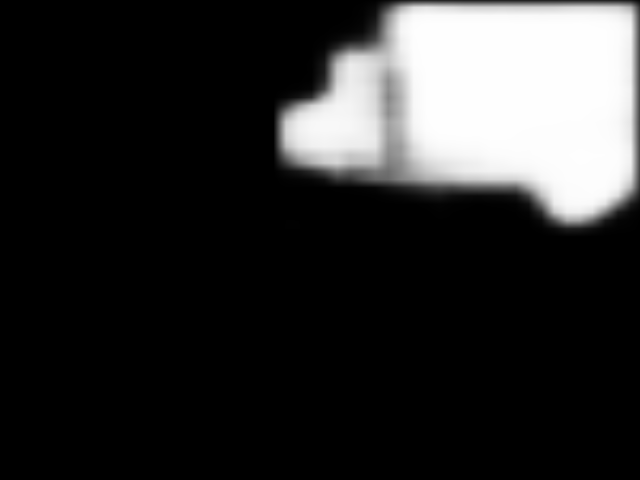

In [7]:
Image.fromarray(prediction[0]['masks'][0, 0].mul(255).byte().cpu().numpy())

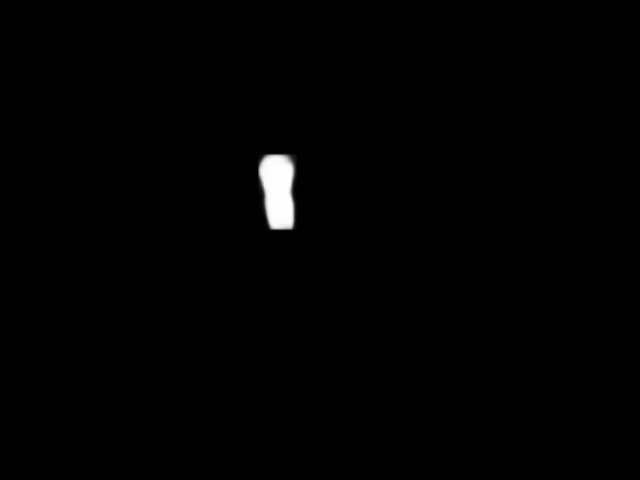

In [8]:
Image.fromarray(prediction[0]['masks'][1, 0].mul(255).byte().cpu().numpy())

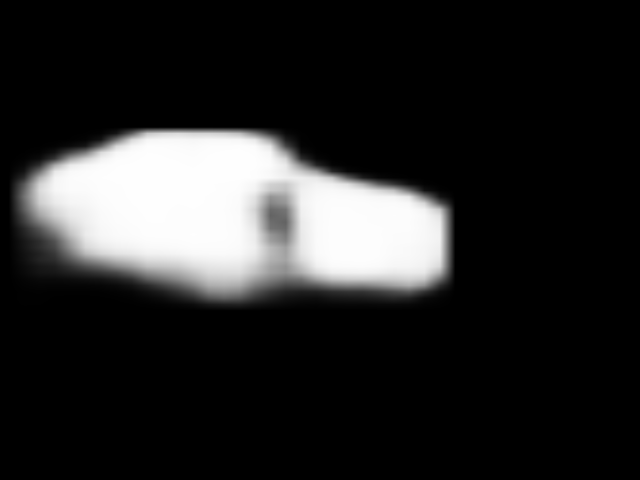

In [9]:
Image.fromarray(prediction[0]['masks'][2, 0].mul(255).byte().cpu().numpy())